In [1]:
import pandas as pd  #for data manipulation operations
import numpy as np   #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle

In [4]:
df = pd.read_csv("../datasets/AAPL (2).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,62.685001,63.880001,62.349998,63.702499,62.129028,167976400
1,2020-03-31,63.900002,65.622498,63.000000,63.572498,62.002239,197002000
2,2020-04-01,61.625000,62.180000,59.782501,60.227501,58.739861,176218400
3,2020-04-02,60.084999,61.287498,59.224998,61.232498,59.720036,165934000
4,2020-04-03,60.700001,61.424999,59.742500,60.352501,58.861771,129880000
...,...,...,...,...,...,...,...
1002,2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
1003,2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
1004,2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400
1005,2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60273300


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [6]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [7]:
df.index = df.index.strftime('%m/%d/%Y')

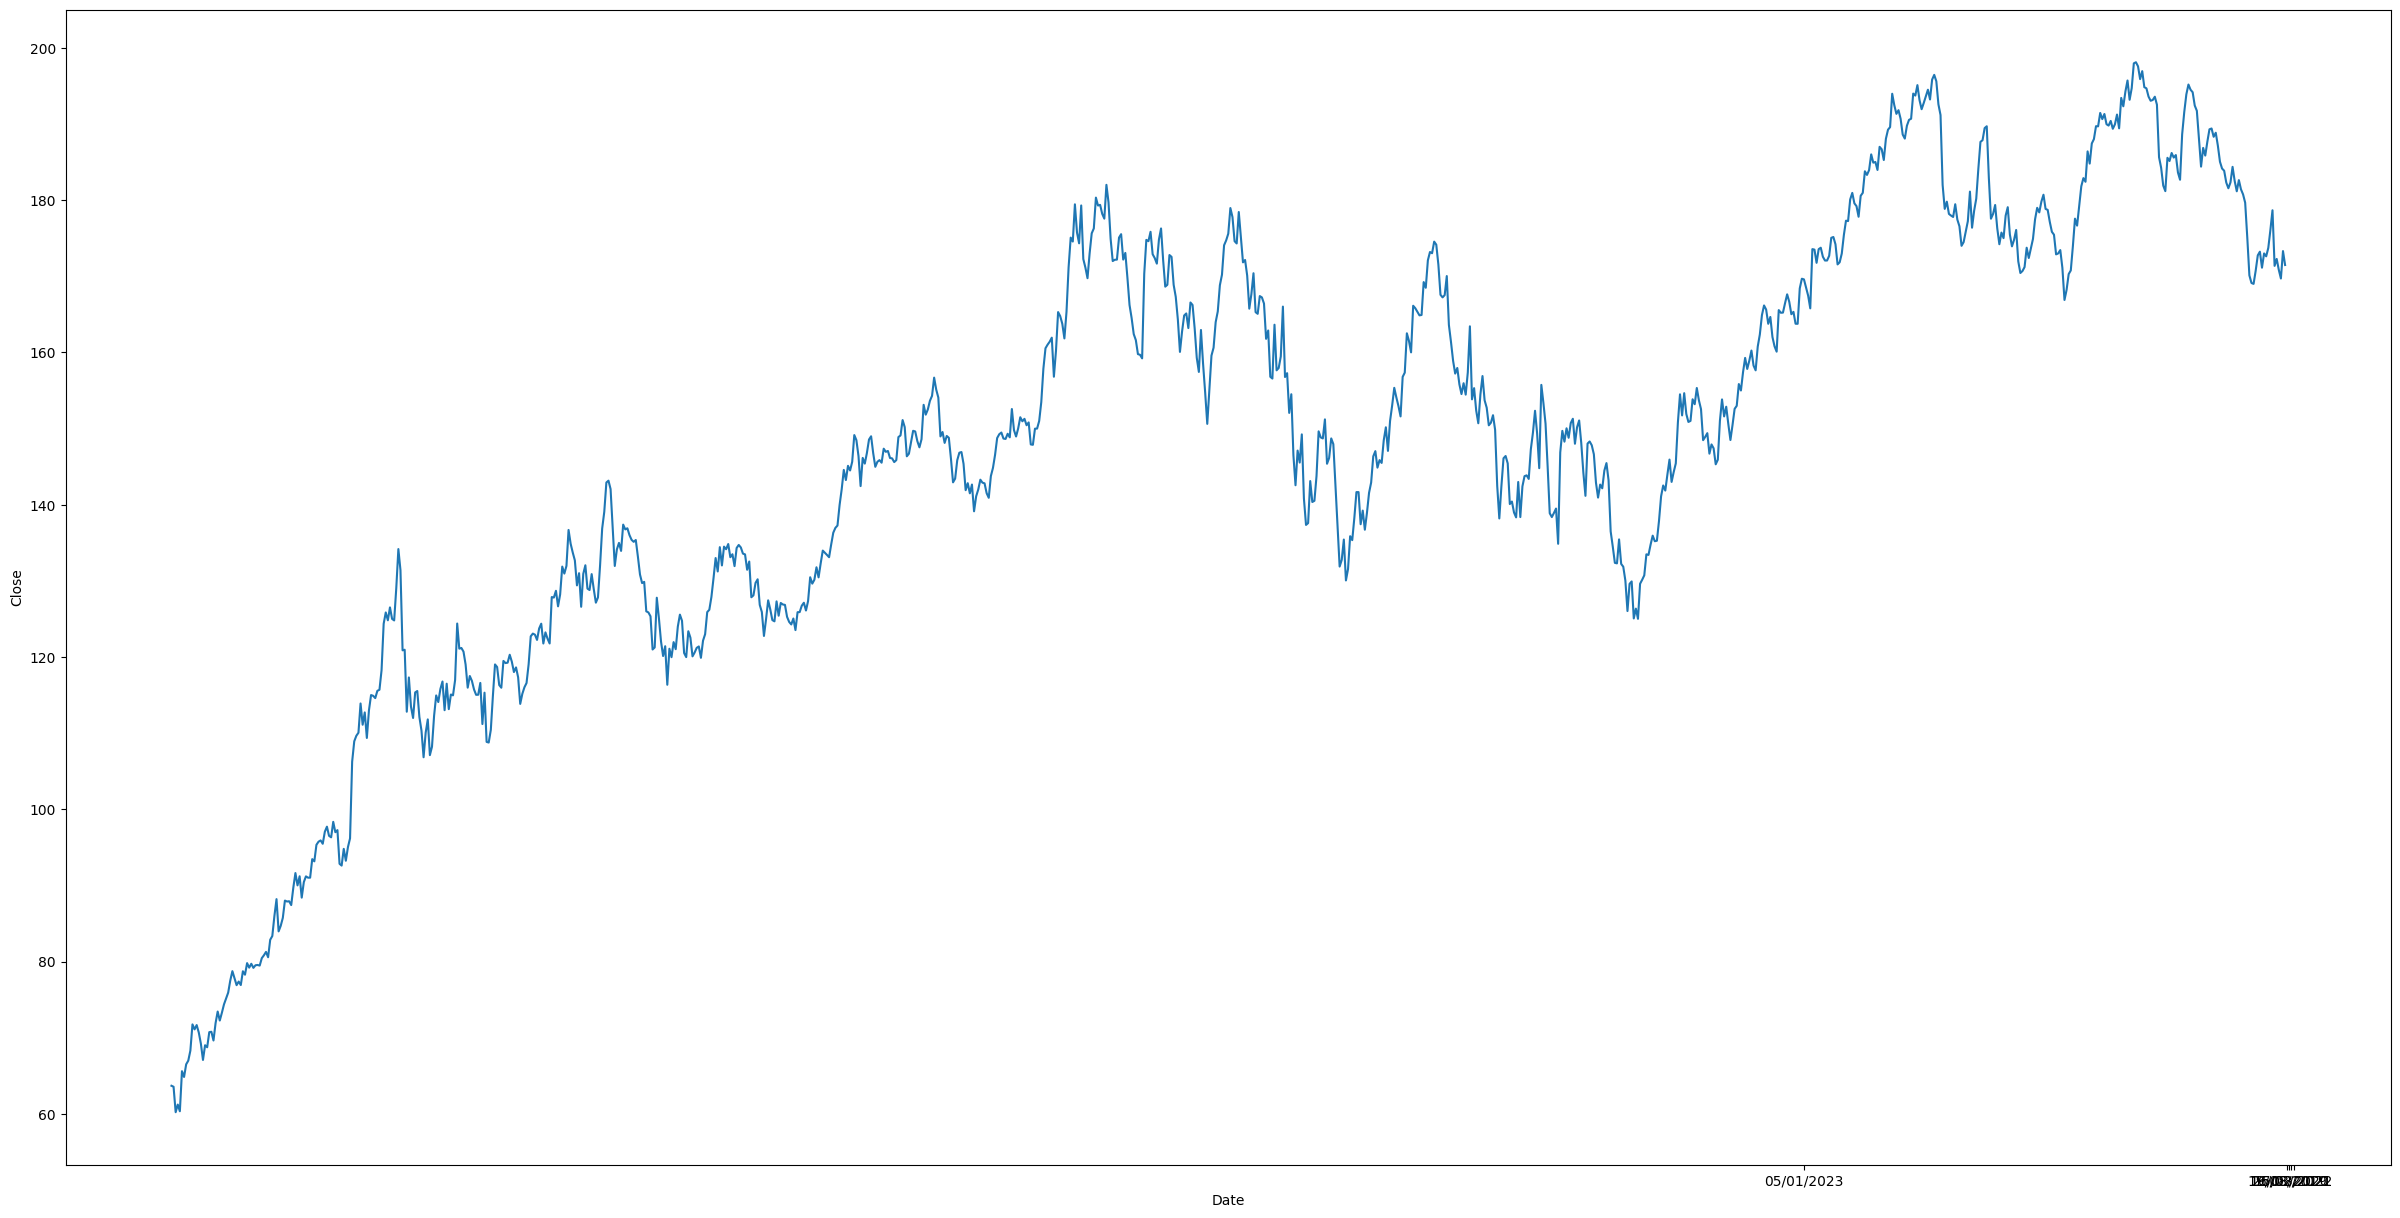

In [8]:
data=df.copy()
plt.figure(figsize=(30,15))
ax=sns.lineplot(x=data.index,y=data['Close'])
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.show()

In [9]:
ma_day = [30, 60, 120,150]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Close'].rolling(ma).mean()

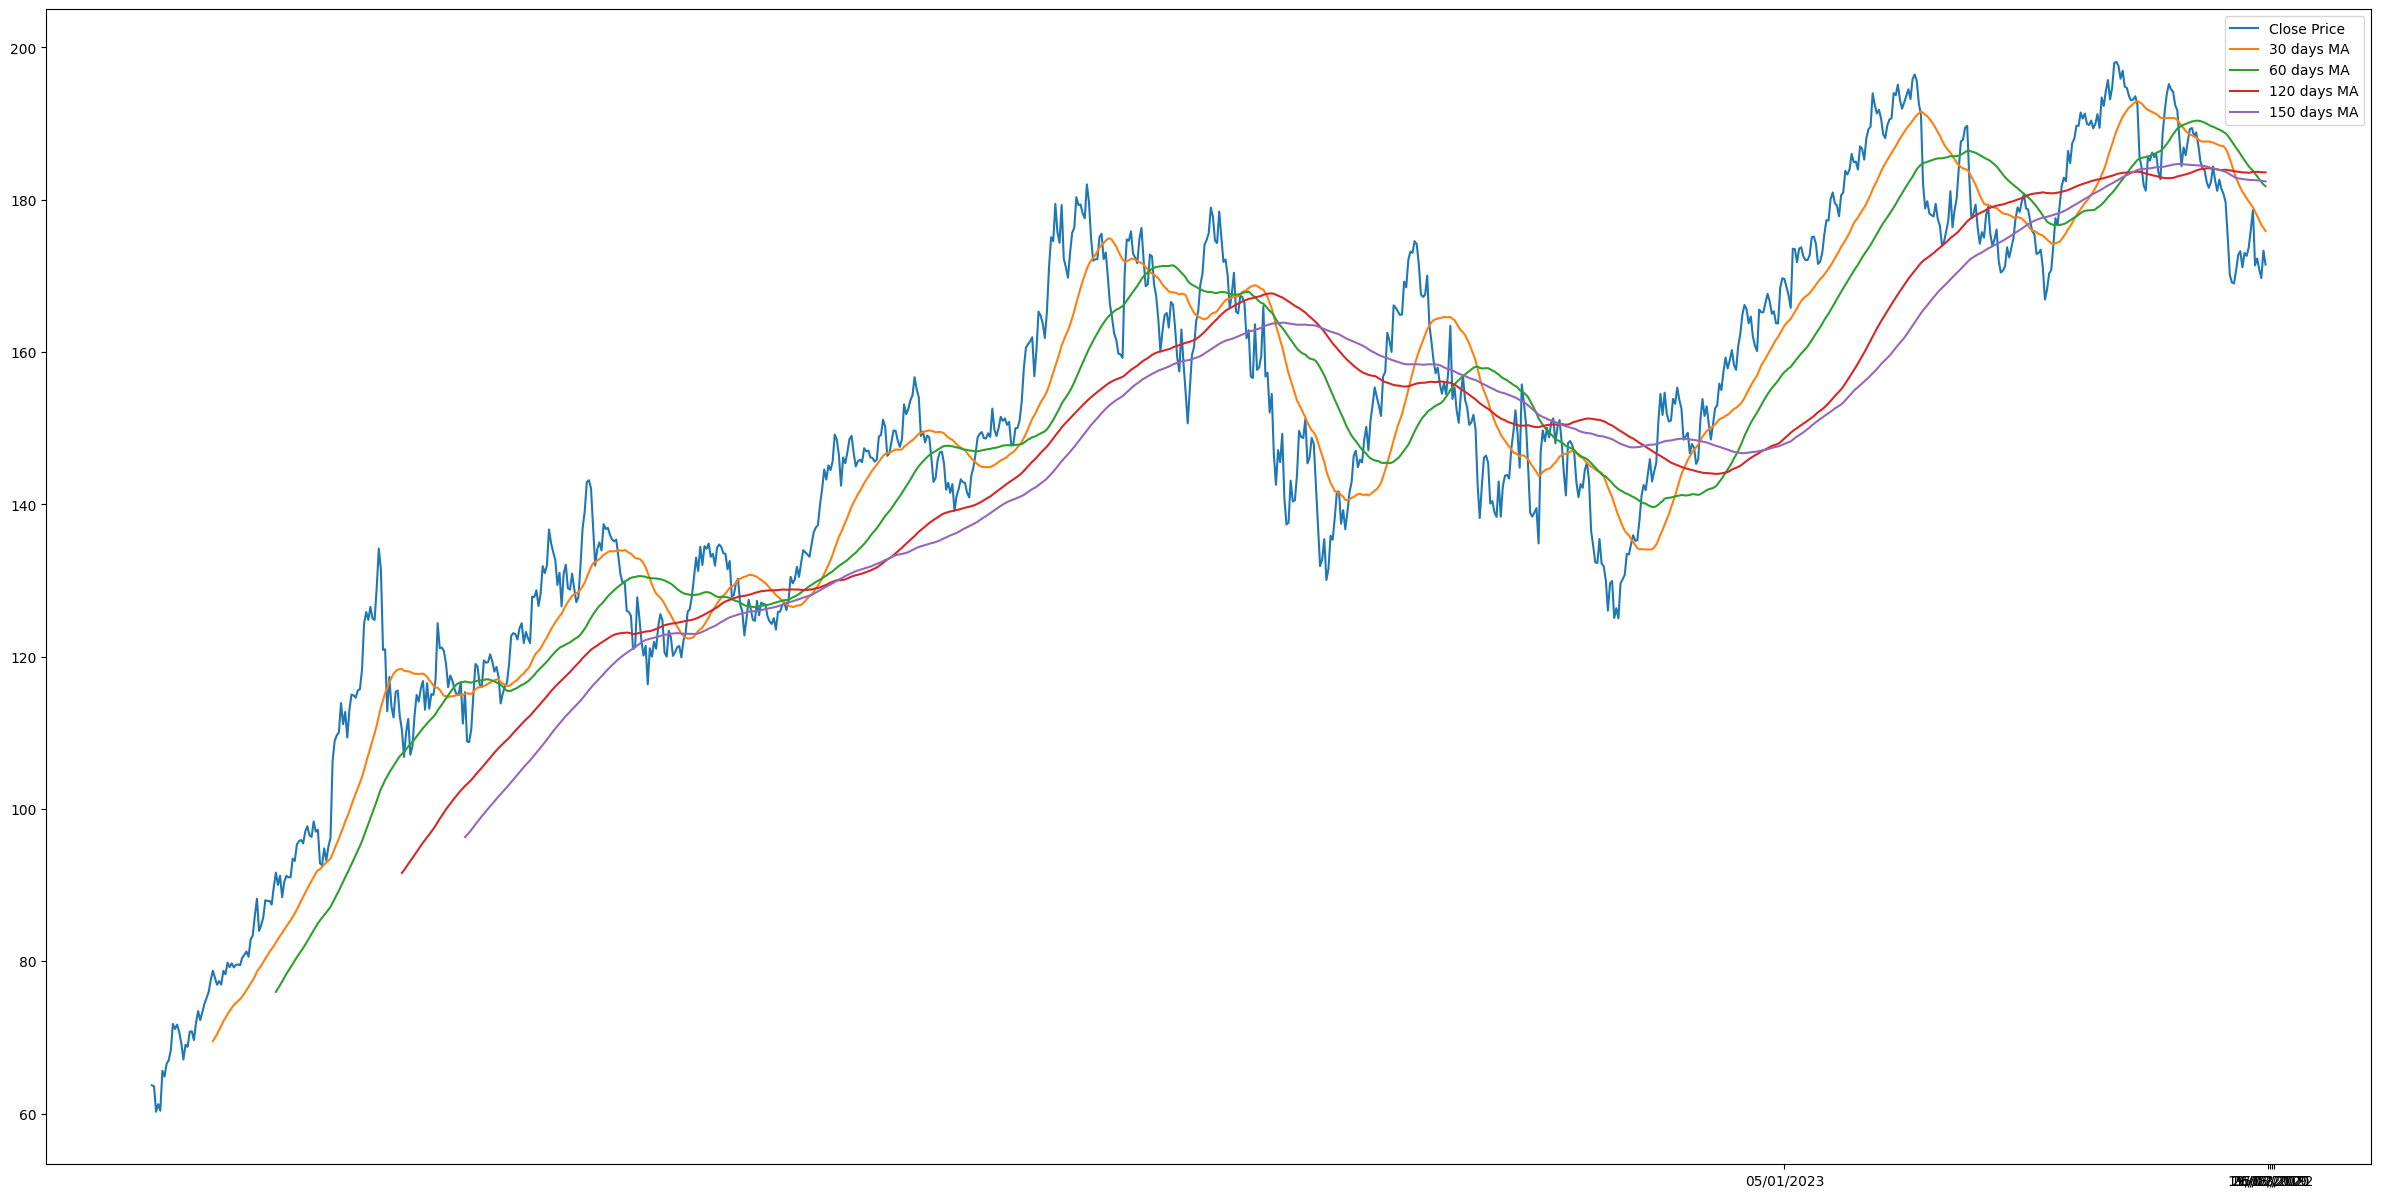

In [10]:
plt.figure(figsize=(30,15))
plt.plot(data['Close'],label='Close Price')
plt.plot(data['MA for 30 days'],label='30 days MA')
plt.plot(data['MA for 60 days'],label='60 days MA')
plt.plot(data['MA for 120 days'],label='120 days MA')
plt.plot(data['MA for 150 days'],label='150 days MA')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [11]:
# Creating a new dataframe with only 'Close'
new_df = data['Close']
new_df.index = data.index

final_df=new_df.values

train_data=final_df[0:646,]
test_data=final_df[646:,]

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['Close'] = train_data
train_df.index = new_df[0:646].index
test_df['Close'] = test_data
test_df.index = new_df[646:].index

In [12]:
print("train_data: ", train_df.shape)
print("test_data: ", test_df.shape)

train_data:  (646, 1)
test_data:  (361, 1)


In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df.reshape(-1,1))

X_train_data,y_train_data=[],[]

for i in range(60,len(train_df)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)

X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))

In [14]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train_data, y_train_data, epochs = 150, batch_size = 32);

Epoch 1/150
19/19 [==============================] - 8s 44ms/step - loss: 0.0878
Epoch 2/150
19/19 [==============================] - 1s 47ms/step - loss: 0.0133
Epoch 3/150
19/19 [==============================] - 1s 46ms/step - loss: 0.0099
Epoch 4/150
19/19 [==============================] - 1s 45ms/step - loss: 0.0081
Epoch 5/150
19/19 [==============================] - 1s 47ms/step - loss: 0.0077
Epoch 6/150
19/19 [==============================] - 1s 49ms/step - loss: 0.0070
Epoch 7/150
19/19 [==============================] - 1s 47ms/step - loss: 0.0068
Epoch 8/150
19/19 [==============================] - 1s 47ms/step - loss: 0.0073
Epoch 9/150
19/19 [==============================] - 1s 48ms/step - loss: 0.0065
Epoch 10/150
19/19 [==============================] - 1s 47ms/step - loss: 0.0062
Epoch 11/150
19/19 [==============================] - 1s 46ms/step - loss: 0.0069
Epoch 12/150
19/19 [==============================] - 1s 46ms/step - loss: 0.0055
Epoch 13/150
19/19 [=====

In [16]:
input_data=new_df[len(new_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [17]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [18]:
predicted=model.predict(X_test)
predicted=scaler.inverse_transform(predicted)

12/12 [==============================] - 1s 18ms/step


In [19]:
test_df['Predictions']=predicted

In [20]:
test_df

,Close,Predictions
Date,,
10/20/2022,143.389999,141.671936
10/21/2022,147.270004,142.599808
10/24/2022,149.449997,143.725388
10/25/2022,152.339996,145.335129
10/26/2022,149.350006,147.524216
...,...,...
03/22/2024,172.279999,172.084763
03/25/2024,170.850006,170.691849
03/26/2024,169.710007,169.036880


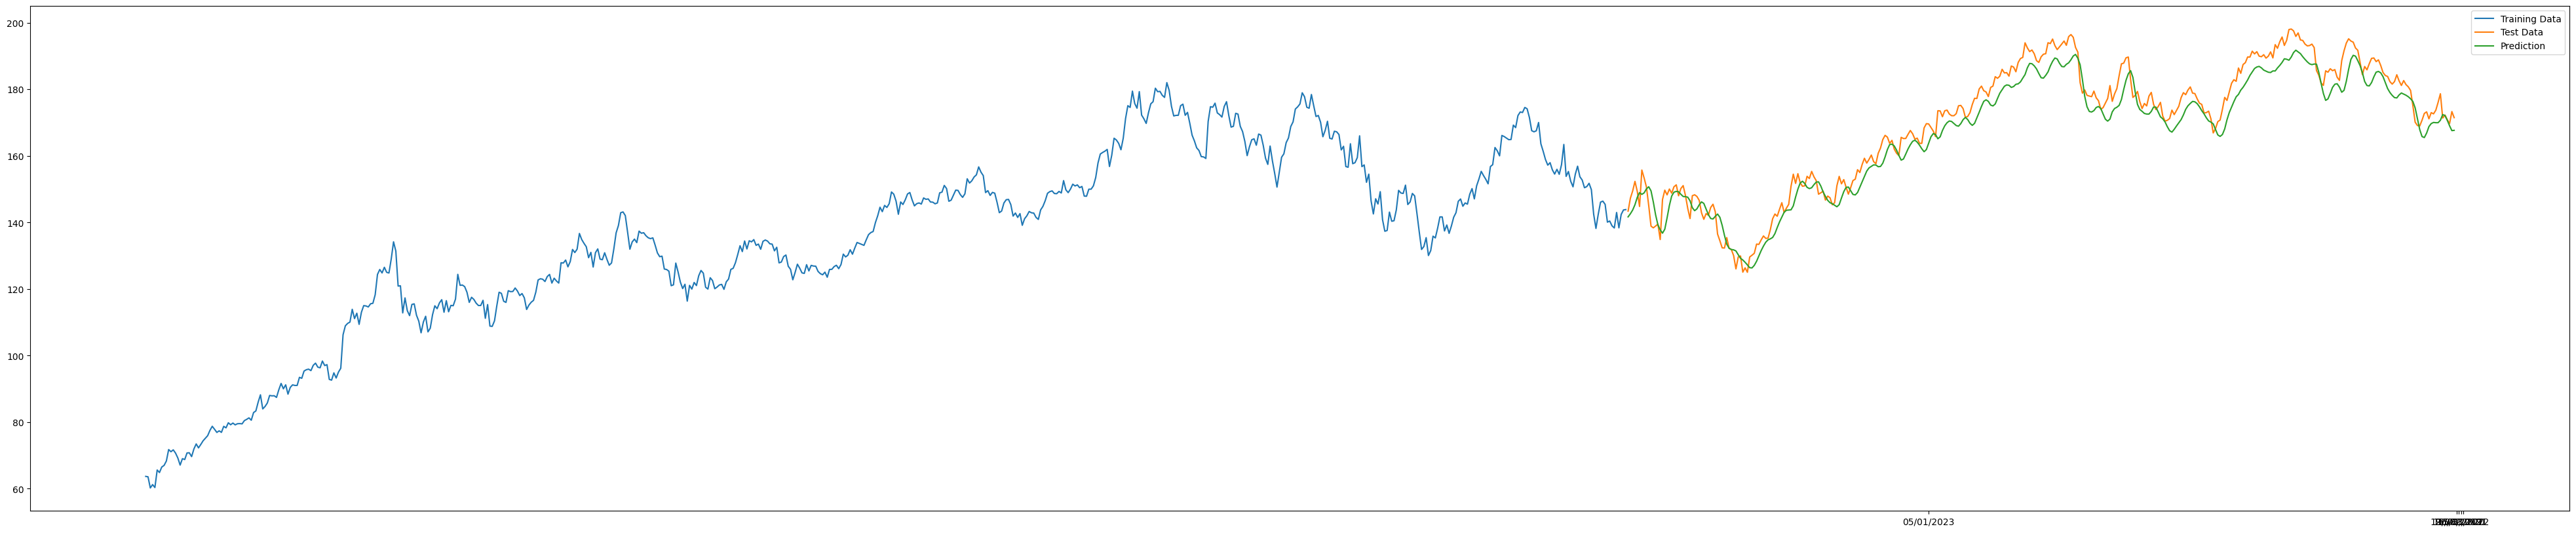

In [21]:
plt.figure(figsize=(50,10))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],label='Test Data')
plt.plot(test_df['Predictions'],label='Prediction')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [22]:
new_df[-1]

171.479996

In [23]:
recent_data = new_df[-60:].values  # Assuming new_df contains the entire historical data
scaled_recent_data = scaler.transform(recent_data.reshape(-1, 1))

# Reshape and format the input data
X_future = scaled_recent_data.reshape((1, 60, 1))

# Make the prediction
predicted_price = model.predict(X_future)

# Inverse scale the prediction
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted price for 1st April 2024:", predicted_price[0][0])

1/1 [==============================] - 0s 21ms/step
Predicted price for 1st April 2024: 168.31743


In [24]:
new_df

Date
03/30/2020     63.702499
03/31/2020     63.572498
04/01/2020     60.227501
04/02/2020     61.232498
04/03/2020     60.352501
                 ...    
03/22/2024    172.279999
03/25/2024    170.850006
03/26/2024    169.710007
03/27/2024    173.309998
03/28/2024    171.479996
Name: Close, Length: 1007, dtype: float64

In [25]:
new_df = pd.concat([new_df, pd.Series(predicted_price[0][0], index=[pd.Timestamp(f'2024-04-01')])])

In [26]:
new_df

03/30/2020              63.702499
03/31/2020              63.572498
04/01/2020              60.227501
04/02/2020              61.232498
04/03/2020              60.352501
                          ...    
03/25/2024             170.850006
03/26/2024             169.710007
03/27/2024             173.309998
03/28/2024             171.479996
2024-04-01 00:00:00    168.317429
Length: 1008, dtype: float64

In [27]:
import pandas as pd
predicted_prices = []

# Iterate over each day from 1st April to 30th April
for day in range(2, 31):
    # Prepare input data for the current day
    start_index = len(new_df) - 60  # Start index of the last 60 days
    end_index = len(new_df)  # End index is exclusive
    input_data = new_df.iloc[start_index:end_index].values.reshape(-1, 1)
    scaled_input_data = scaler.transform(input_data)
    X_day = scaled_input_data.reshape((1, 60, 1))
    
    # Predict the price for the current day
    predicted_price = model.predict(X_day)
    predicted_price = scaler.inverse_transform(predicted_price)
    
    # Append the predicted price to the list
    predicted_prices.append(predicted_price[0][0])
    
    # Create a new Series with the predicted price and concatenate it with the original Series
    new_df = pd.concat([new_df, pd.Series(predicted_price[0][0], index=[pd.Timestamp(f'2024-04-{day}')])])

# Convert the Series to a DataFrame
df = new_df.to_frame(name='Close')

# Display the DataFrame with predicted prices for April
print(df.head())


1/1 [==============================] - 0s 20ms/step
                Close
03/30/2020  63.702499
03/31/2020  63.572498
04/01/2020  60.227501
04/02/2020  61.232498
04/03/2020  60.352501


In [28]:
apple_prediction = df[-30:]
type(apple_prediction)

pandas.core.frame.DataFrame

In [29]:
apple_prediction.to_csv(r"C:\Users\Ritesh\Desktop\TeamSynergy_Codeshastra\results\apple_prediction.csv")